In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
file_path = 'Dataset.csv'

In [98]:
data = pd.read_csv(file_path, delimiter=';')

In [99]:
data.head()

,Column1,Column2
0,Text,Label
1,The impact of educational reforms remains unce...,positive
2,Critics argue that recent improvements in the ...,negative
3,Innovative teaching methods have led to unexpe...,positive
4,"Despite budget constraints, the school has man...",positive


In [100]:
data.shape

(401, 2)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Column1  401 non-null    object
 1   Column2  401 non-null    object
dtypes: object(2)
memory usage: 6.4+ KB


In [102]:
data.Column1.head()

0                                                 Text
1    The impact of educational reforms remains unce...
2    Critics argue that recent improvements in the ...
3    Innovative teaching methods have led to unexpe...
4    Despite budget constraints, the school has man...
Name: Column1, dtype: object

In [103]:
! pip install textblob

In [104]:
lowercase_data=[]
for i in range (52):
  phrase = (data['Column1'][i]).lower()
  lowercase_data.append(phrase)

In [105]:
lowercase_data[:2]

['text',
 'the impact of educational reforms remains uncertain despite extensive research.']

In [106]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\siyak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [107]:
tokenized_data=[]
for phrase in lowercase_data:
  li=word_tokenize(phrase)
  tokenized_data.append(li)

In [108]:
tokenized_data[:2]

[['text'],
 ['the',
  'impact',
  'of',
  'educational',
  'reforms',
  'remains',
  'uncertain',
  'despite',
  'extensive',
  'research',
  '.']]

In [109]:
no_punctuation_data=[]
import re
for li in tokenized_data:
  clean=[]
  for w in li:
    res=re.sub(r'[^\w\s]',"",w)
    if res!="":
      clean.append(res)
  no_punctuation_data.append(li)

In [110]:
no_punctuation_data[:3]

[['text'],
 ['the',
  'impact',
  'of',
  'educational',
  'reforms',
  'remains',
  'uncertain',
  'despite',
  'extensive',
  'research',
  '.'],
 ['critics',
  'argue',
  'that',
  'recent',
  'improvements',
  'in',
  'the',
  'school',
  'system',
  'are',
  'merely',
  'superficial',
  '.']]

In [111]:
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siyak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [112]:
no_stopwords_data=[]
for phrase in no_punctuation_data:
    clean=[]
    for i in phrase: 
      if not i in stopwords.words("english"):
        clean.append(i)
    no_stopwords_data.append(phrase)

In [113]:
no_stopwords_data[:2]

[['text'],
 ['the',
  'impact',
  'of',
  'educational',
  'reforms',
  'remains',
  'uncertain',
  'despite',
  'extensive',
  'research',
  '.']]

In [114]:
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()

stem_data=[]
for li in no_punctuation_data:
  clean=[]
  for word in li:
    w=stemmer.stem(word)
    clean.append(w)
  stem_data.append(clean)

In [115]:
stem_data[:2]

[['text'],
 ['the',
  'impact',
  'of',
  'educ',
  'reform',
  'remain',
  'uncertain',
  'despit',
  'extens',
  'research',
  '.']]

In [116]:
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download("wordnet")
lem = WordNetLemmatizer()

lemmatized_data=[]
for li in stem_data:
  clean=[]
  for words in li:
    w=lem.lemmatize(words)
    clean.append(w)
  lemmatized_data.append(clean)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\siyak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [117]:
lemmatized_data[:4]

[['text'],
 ['the',
  'impact',
  'of',
  'educ',
  'reform',
  'remain',
  'uncertain',
  'despit',
  'extens',
  'research',
  '.'],
 ['critic',
  'argu',
  'that',
  'recent',
  'improv',
  'in',
  'the',
  'school',
  'system',
  'are',
  'mere',
  'superfici',
  '.'],
 ['innov',
  'teach',
  'method',
  'have',
  'led',
  'to',
  'unexpect',
  'challeng',
  'for',
  'both',
  'student',
  'and',
  'teacher',
  '.']]

In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [119]:
vectorizer = TfidfVectorizer(stop_words='english')

In [120]:
X = vectorizer.fit_transform(data['Column1'])
y = data['Column2']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [123]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Use an appropriate average for multiclass classification
precision = precision_score(y_test, y_pred, average='macro')  # You can also use 'micro' or 'weighted'
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9876543209876543
Precision: 0.6592592592592593
Recall: 0.6666666666666666
F1 Score: 0.6629213483146067


C:\Users\siyak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [124]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [125]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Column1'])
y = data['Column2']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [128]:
y_true = y_test  # Replace with the actual test labels
y_pred = model.predict(X_test)  # Use your model to make predictions
accuracy = accuracy_score(y_test, y_pred)
# Step 3: Calculate precision, recall, and f1-score
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_true, y_pred, average='macro', zero_division=1)
recall = recall_score(y_true, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_true, y_pred, average='macro', zero_division=1)

print("Accuracy:" ,accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9876543209876543
Precision: 0.9925925925925926
Recall: 0.6666666666666666
F1 Score: 0.6629213483146067


Accuracy: 0.9876543209876543
              precision    recall  f1-score   support

      Class1       0.00      0.00      0.00         1
      Class2       1.00      1.00      1.00        36
      Class3       0.98      1.00      0.99        44

    accuracy                           0.99        81
   macro avg       0.66      0.67      0.66        81
weighted avg       0.98      0.99      0.98        81



C:\Users\siyak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\siyak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\siyak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


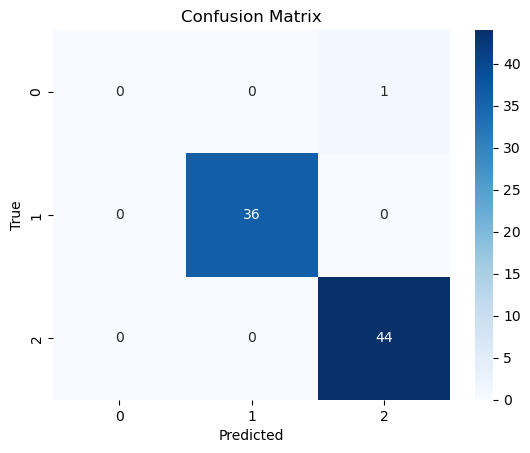

In [129]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report
print(classification_report(y_test, y_pred, target_names=['Class1', 'Class2', 'Class3']))  # Adjust class names as necessary

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


C:\Users\siyak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\siyak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\siyak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\siyak\anaconda3\Lib\site-packag

Accuracy: 0.9876543209876543
Precision: 0.975582990397805
Recall: 0.9876543209876543
F1 Score: 0.9815508392287419
              precision    recall  f1-score   support

       Label       0.00      0.00      0.00         1
    negative       1.00      1.00      1.00        36
    positive       0.98      1.00      0.99        44

    accuracy                           0.99        81
   macro avg       0.66      0.67      0.66        81
weighted avg       0.98      0.99      0.98        81



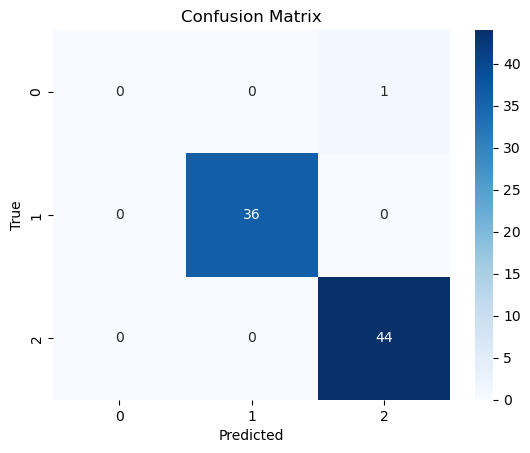

In [130]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Predictions
y_pred = model.predict(X_test)

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [132]:
!pip install fastapi uvicorn

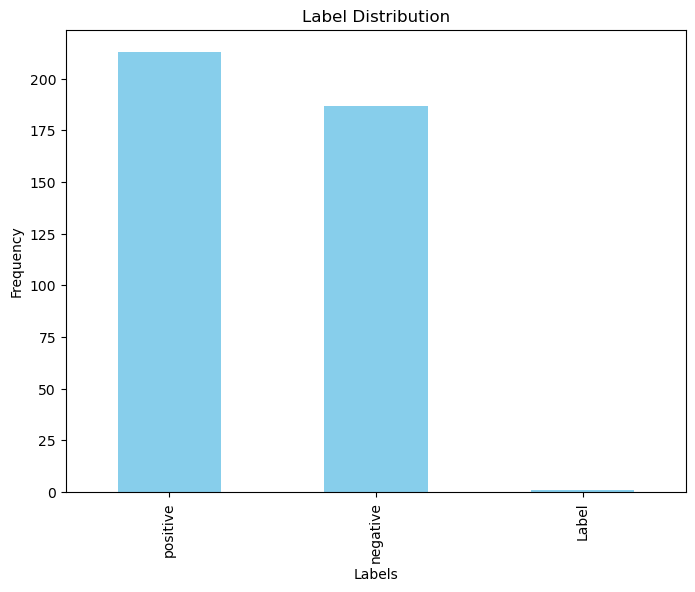

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Dataset.csv'
data = pd.read_csv(file_path, delimiter=';')

# Plot the distribution of labels
plt.figure(figsize=(8, 6))
data['Column2'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.show()



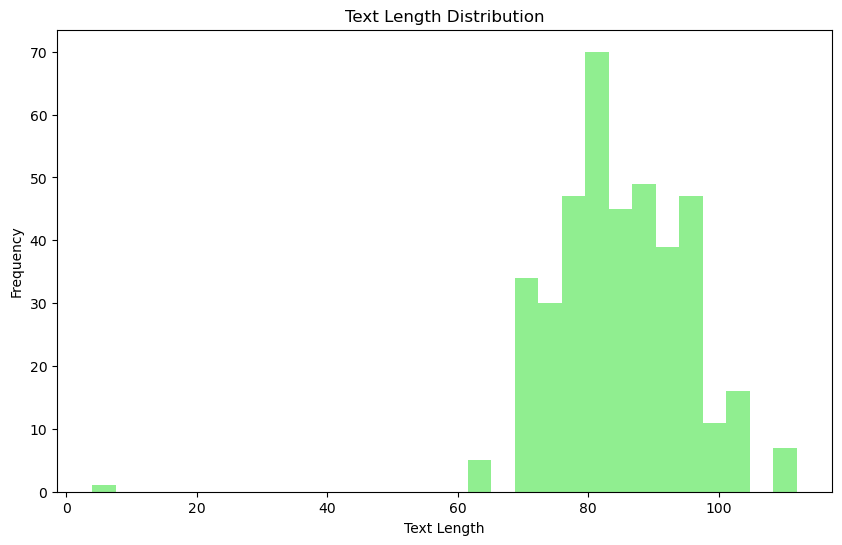

In [134]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Dataset.csv'
data = pd.read_csv(file_path, delimiter=';')

# Calculate the length of each text entry
data['text_length'] = data['Column1'].apply(len)

# Plot the distribution of text lengths
plt.figure(figsize=(10, 6))
plt.hist(data['text_length'], bins=30, color='lightgreen')
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [135]:
!pip install wordcloud


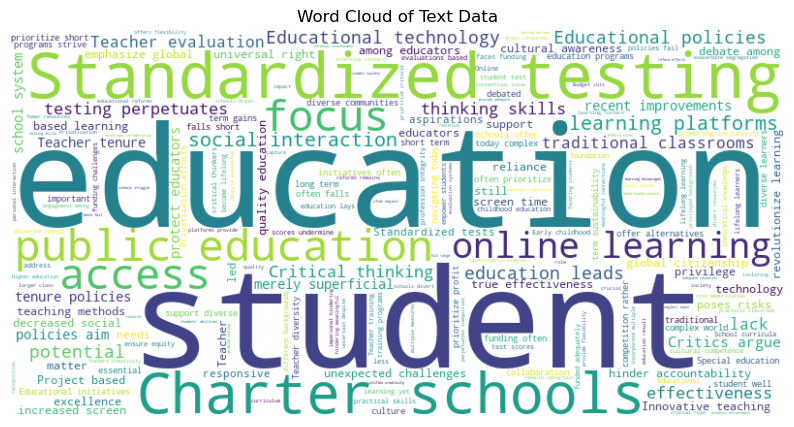

In [136]:
import pandas as pd
from wordcloud import WordCloud  # Ensure this line is present
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Dataset.csv'
data = pd.read_csv(file_path, delimiter=';')

# Combine all text data into a single string
text = ' '.join(data['Column1'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data')
plt.show()


In [137]:
pip install Flask scikit-learn pandas joblib

Note: you may need to restart the kernel to use updated packages.


In [138]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import joblib

# Load your dataset
data = pd.read_csv('Dataset.csv', delimiter=';')

# Split the data into features and labels
X = data['Column1']  # Text data
y = data['Column2']  # Labels (e.g., positive, negative)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with TF-IDF and SVM
model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', SVC(kernel='linear', probability=True))
])

# Train the model
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, 'sentiment_model.pkl')


['sentiment_model.pkl']

In [139]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import joblib

# Load your trained sentiment analysis model
model = joblib.load('sentiment_model.pkl')  # Replace with the path to your model file

# Create the input text box
text_input = widgets.Text(
    value='',
    placeholder='Type something...',
    description='Text:',
    disabled=False
)

# Create an output area to display the prediction
output = widgets.Output()

def on_button_click(b):
    with output:
        clear_output()  # Clear previous output
        text = text_input.value
        prediction = model.predict([text])
        print(f'Predicted Sentiment: {prediction[0]}')

# Create a button to trigger the prediction
button = widgets.Button(
    description='Analyze Sentiment',
    disabled=False,
    button_style='',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to analyze sentiment',
    icon='check'
)

# Link the button click event to the function
button.on_click(on_button_click)

# Display the widgets
display(text_input, button, output)


Text(value='', description='Text:', placeholder='Type something...')

Button(description='Analyze Sentiment', icon='check', style=ButtonStyle(), tooltip='Click to analyze sentiment…

Output()

In [150]:
import joblib

# Load your trained sentiment analysis model
model = joblib.load('sentiment_model.pkl')  # Replace with your model file path

# Simple text input and prediction in a loop
while True:
    text = input("Enter text to analyze (or 'quit' to exit): ")
    if text.lower() == 'quit':
        break
    prediction = model.predict([text])
    print(f'Predicted Sentiment: {prediction[0]}')


Enter text to analyze (or 'quit' to exit):  Critics argue that recent improvements in the school system are merely superficial.


Predicted Sentiment: negative


Enter text to analyze (or 'quit' to exit):  The impact of educational reforms remains uncertain despite extensive research.


Predicted Sentiment: positive


KeyboardInterrupt: Interrupted by user

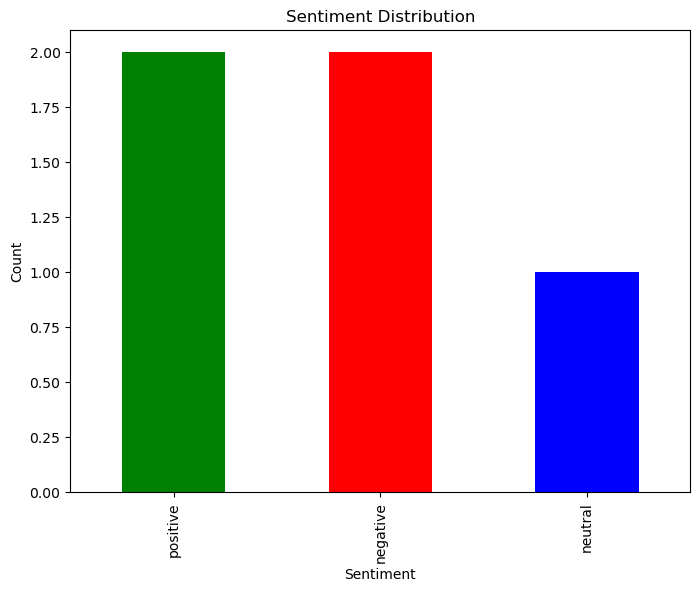

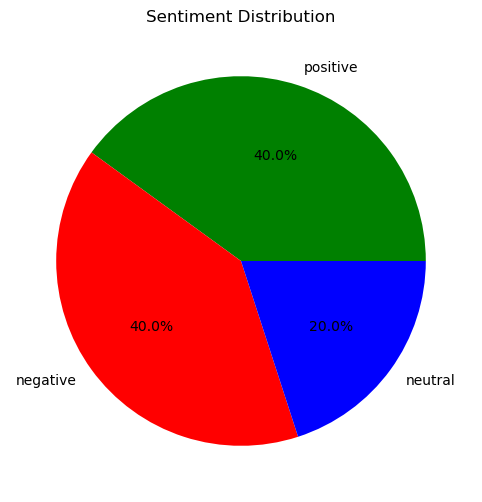

In [142]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data: replace this with your dataset
data = {'Sentiment': ['positive', 'negative', 'neutral', 'positive', 'negative']}
df = pd.DataFrame(data)

# Count sentiment occurrences
sentiment_counts = df['Sentiment'].value_counts()

# Bar Chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Pie Chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.ylabel('')  # Hide the y-label for cleaner look
plt.show()


C:\Users\siyak\AppData\Local\Temp\ipykernel_37056\3503748925.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sentiment_trends = df.groupby([pd.Grouper(key='Date', freq='M'), 'Sentiment'])['Sentiment_Count'].count().unstack(fill_value=0)


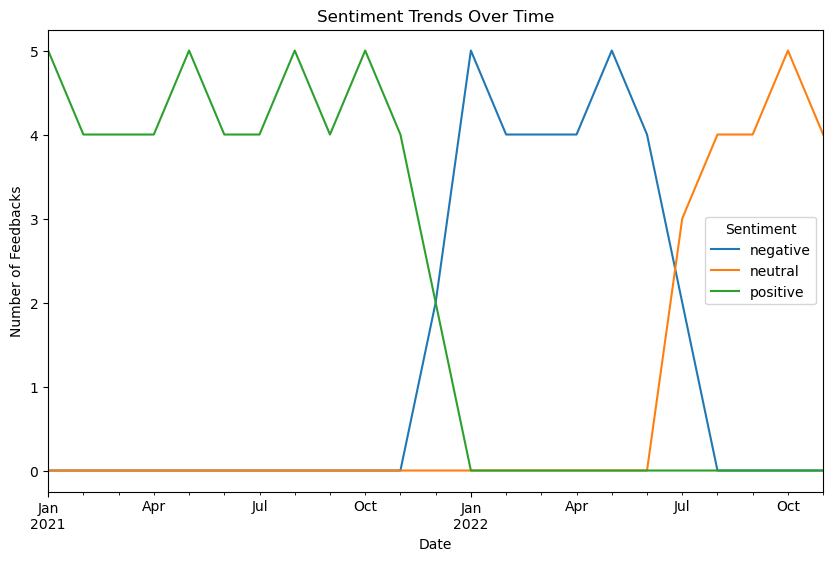

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data: Replace with your own sentiment data with timestamps
data = {'Date': pd.date_range(start='2021-01-01', periods=100, freq='W'),
        'Sentiment': ['positive']*50 + ['negative']*30 + ['neutral']*20}
df = pd.DataFrame(data)

# Resample by month and count sentiments
df['Sentiment_Count'] = 1
sentiment_trends = df.groupby([pd.Grouper(key='Date', freq='M'), 'Sentiment'])['Sentiment_Count'].count().unstack(fill_value=0)

# Plot the sentiment trends over time
sentiment_trends.plot(kind='line', figsize=(10, 6))
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Feedbacks')
plt.show()


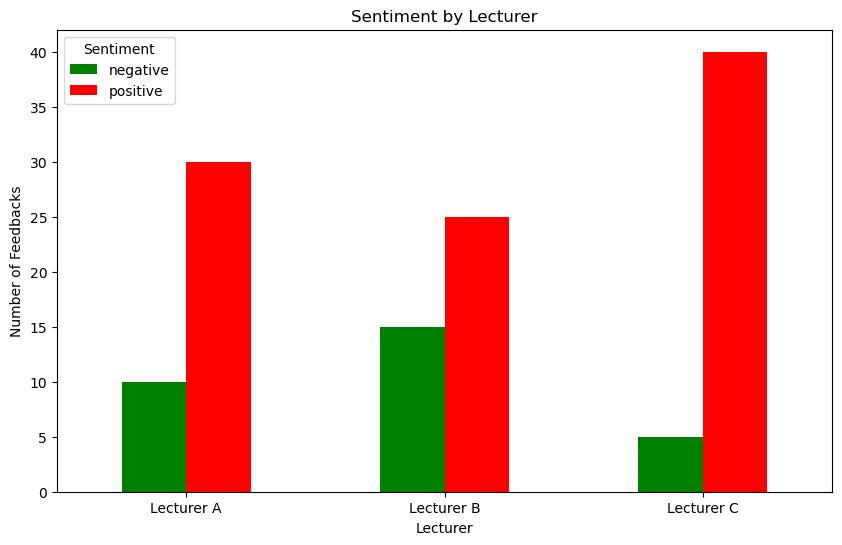

In [146]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data: Replace with your actual data for lecturers and sentiments
data = {'Lecturer': ['Lecturer A', 'Lecturer A', 'Lecturer B', 'Lecturer B', 'Lecturer C', 'Lecturer C'],
        'Sentiment': ['positive', 'negative', 'positive', 'negative', 'positive', 'negative'],
        'Count': [30, 10, 25, 15, 40, 5]}
df = pd.DataFrame(data)

# Pivot table to get sentiments as columns
pivot_df = df.pivot(index='Lecturer', columns='Sentiment', values='Count')

# Plot grouped bar chart
pivot_df.plot(kind='bar', figsize=(10, 6), color=['green', 'red'])
plt.title('Sentiment by Lecturer')
plt.xlabel('Lecturer')
plt.ylabel('Number of Feedbacks')
plt.xticks(rotation=0)
plt.show()


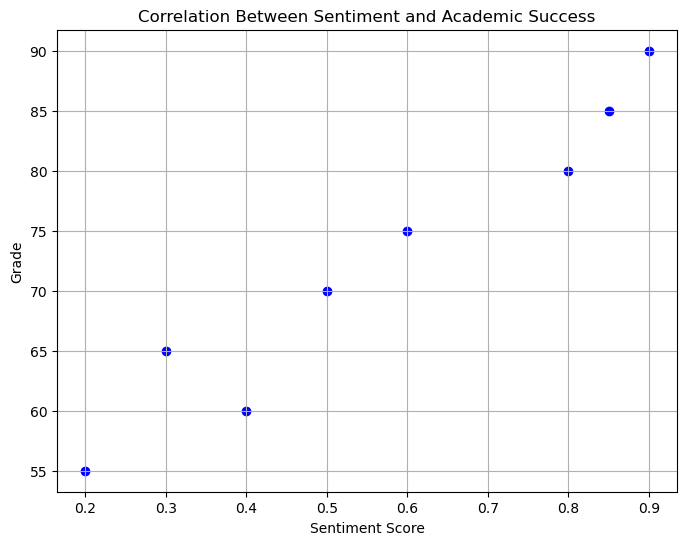

In [148]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data: Replace with your actual grades and sentiment data
data = {'Grade': [80, 75, 90, 85, 60, 55, 70, 65],
        'Sentiment_Score': [0.8, 0.6, 0.9, 0.85, 0.4, 0.2, 0.5, 0.3]}  # Positive = high, Negative = low
df = pd.DataFrame(data)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Sentiment_Score'], df['Grade'], color='blue')
plt.title('Correlation Between Sentiment and Academic Success')
plt.xlabel('Sentiment Score')
plt.ylabel('Grade')
plt.grid(True)
plt.show()


In [2]:
import tkinter as tk
from tkinter import messagebox
import joblib

# Load the pre-trained sentiment analysis model
model = joblib.load('sentiment_model.pkl')  # Replace with your actual model path

# Function to handle sentiment prediction
def analyze_sentiment():
    # Get the input text from the entry box
    input_text = entry.get()
    
    if input_text.lower() == 'quit':
        root.quit()
    elif input_text.strip() == "":
        messagebox.showwarning("Input Error", "Please enter some text to analyze.")
    else:
        # Perform sentiment prediction
        prediction = model.predict([input_text])
        
        # Show the predicted sentiment
        result_label.config(text=f'Predicted Sentiment: {prediction[0]}')

# Create the main application window
root = tk.Tk()
root.title("Sentiment Analysis")

# Create and place the input text box
entry_label = tk.Label(root, text="Enter text to analyze:")
entry_label.pack(pady=10)

entry = tk.Entry(root, width=110)
entry.pack(pady=10)

# Create and place the button to trigger sentiment analysis
analyze_button = tk.Button(root, text="Analyze Sentiment", command=analyze_sentiment)
analyze_button.pack(pady=10)

# Create and place the label to display the result
result_label = tk.Label(root, text="Predicted Sentiment: ", font=('Helvetica', 12))
result_label.pack(pady=20)

# Run the Tkinter main loop
root.mainloop()
